In [1]:
# first let's import the datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale

In [2]:
# we will now be working on the dataset iris, which is already packaged in Sklearn
digits = datasets.load_digits()
# remember that digits is an embedded dataset within sklearn, so some of these functions won't apply to an external dataset
# .keys will show the different variables available within the dataset
# data is the available input, and target is the true value to be predicted
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# scale is a function that will allow to scale the dataset
# more information can be found on the following link
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
data = scale(digits.data)

In [4]:
# the following instruction will return the shape of the dataset
n_samples, n_features = data.shape
print("number of rows:", n_samples)
print("number of features:", n_features)

# the following instruction will return the number of different values in the target feature
n_digits = len(np.unique(digits.target))

# n_digits will be used as the number of clusters 
print("number of different values for the target:", n_digits)
digits

number of rows: 1797
number of features: 64
number of different values for the target: 10


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
# Remember that an EDA can help to better understand the dataset

In [6]:
# this will allow the create the AgglomerativeClustering Model
model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average", affinity="cosine")

# Once created, now we can fit the model to the data
model.fit(data)

AgglomerativeClustering(linkage='average', n_clusters=10)

In [7]:
# now we can calculate the silhouette score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
print("Silhouette Coefficient:", metrics.silhouette_score(data, model.labels_))

# We can also calculate the calinski_harabasz_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html
print("Calinski_harabasz Coefficient:", metrics.calinski_harabasz_score(data, model.labels_))

Silhouette Coefficient: 0.5317322123880858
Calinski_harabasz Coefficient: 29.01013903438364


In [8]:
# Since we already have the true labels, we can also calculate the completeness and the homogeneity scores
print("Completeness score", metrics.completeness_score(digits.target, model.labels_))
print("Homogeneity score", metrics.homogeneity_score(digits.target, model.labels_))
# However, this might not be possible for other datasets when the true labels are not available
# Also, we need to make sure that the number of clusters is equal to the number of the unique values of the true target

Completeness score 0.2375556564096039
Homogeneity score 0.007131853198191474


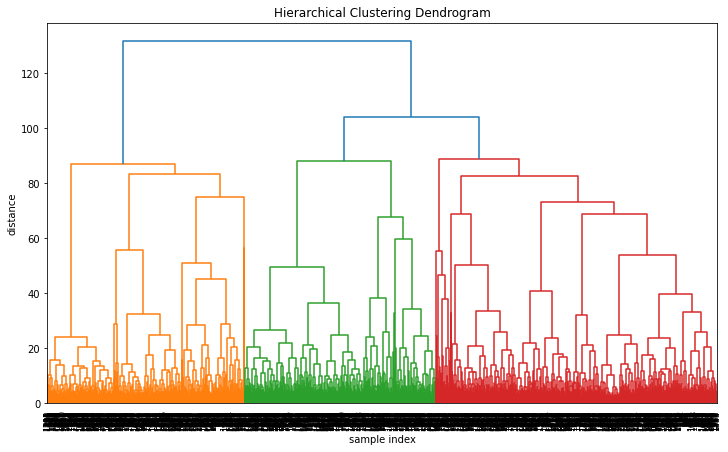

In [9]:
# this code will show how we can draw a dendrogram 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
# Note that this might take time to be excuted, approximately 1-2 minutes, this also depends on the size of the dataset
from scipy.cluster.hierarchy import dendrogram, linkage

# in this example, we are using ward as linkage as it is more appropriate for this dataset
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
model = linkage(data, 'ward')

# we can increase the size of the graph, if needed
plt.figure(figsize=(12,7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(model, leaf_rotation=90., leaf_font_size=8.,)
plt.show()